```
補助本「ゼロから作るDeep Learning」
3章～7章までを輪読会の補足として、読んで行きます。
Eli Kaminuma 2018.1.31
```

In [1]:
### 補助本３章 [2018.1.31]

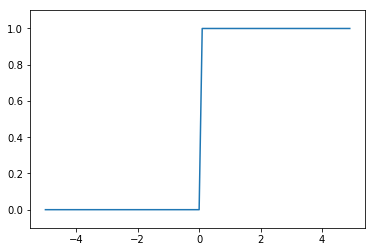

In [1]:
#
# [3.2.3]STEP関数の視覚化
#
import numpy as np
import matplotlib.pylab as plt


def step_function(x):
    return np.array(x > 0, dtype=np.int)

X = np.arange(-5.0, 5.0, 0.1)
Y = step_function(X)
plt.plot(X, Y)
plt.ylim(-0.1, 1.1)  # 図で描画するy軸の範囲を指定
plt.show()


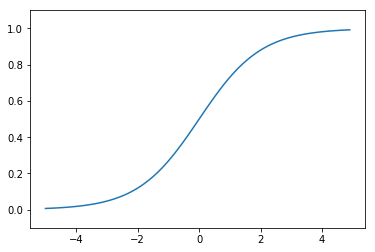

In [2]:
# 補助本３章
#
# [3.2.4]シグモイド関数の視覚化
#
#import numpy as np
#import matplotlib.pylab as plt
#-------------------------------
#math.expは単一の変数のみ
#np.expはベクトルで入力できる
#--------------------------------
def sigmoid(x):
    return 1 / (1 + np.exp(-x))    

X = np.arange(-5.0, 5.0, 0.1)
Y = sigmoid(X)
plt.plot(X, Y)
plt.ylim(-0.1, 1.1)
plt.show()


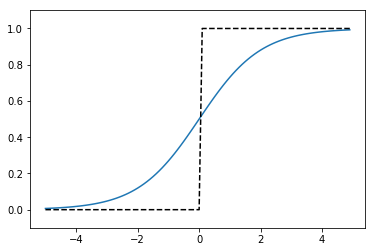

In [3]:
# 補助本３章
#
# [3.2.5]STEP関数 vs シグモイド関数
#
def sigmoid(x):
    return 1 / (1 + np.exp(-x))    


def step_function(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x)
y2 = step_function(x)

plt.plot(x, y1)
plt.plot(x, y2, 'k--')
plt.ylim(-0.1, 1.1) #図で描画するy軸の範囲を指定
plt.show()


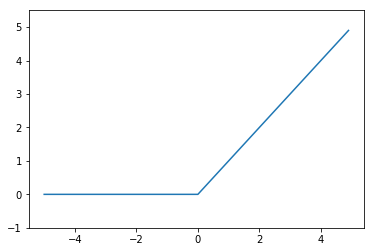

In [5]:
# 補助本３章
#
# [3.2.7]　ReLU(ランプ関数、正規化線形関数)

def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1.0, 5.5)
plt.show()

#

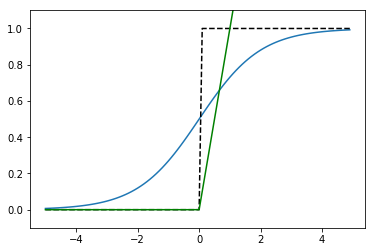

In [35]:
#活性化関数を３種類重ねて表示
#
#

y1 = sigmoid(x)
y2 = step_function(x)
y3 = relu(x)

plt.plot(x, y1)
plt.plot(x, y2, 'k--')
plt.plot(x, y3, 'g')
plt.ylim(-0.1, 1.1) #図で描画するy軸の範囲を指定
plt.show()



In [98]:
# [3.4.2]信号伝達の実装　（p.61,図3-18）
# 入力層から第一層目の1番目ニューロンへの信号伝達
X=np.array([1.0,0.5])
W1=np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
B1=np.array([0.1,0.2,0.3])
print('W1.shape=',W1.shape)
print('X.shape=',X.shape)
print('B1.shape=',B1.shape)

A1=np.dot(X,W1)+B1
Z1=sigmoid(A1)

print('A1.shape=',A1.shape)
print('Z1.shape=',Z1.shape)

print('A1=',A1)
print('Z1=',Z1)

W1.shape= (2, 3)
X.shape= (2,)
B1.shape= (3,)
A1.shape= (3,)
Z1.shape= (3,)
A1= [0.3 0.7 1.1]
Z1= [0.57444252 0.66818777 0.75026011]


In [99]:
# [3.4.3]信号伝達の実装のまとめ　（p.65）
# 入力層から出力層のニューロンへの信号伝達

def identity_function(x):
    return x

def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    return network
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x) #入力から出力方向への伝達処理
print('y=',y) # [ 0.31682708 0.69627909]

y= [0.31682708 0.69627909]


In [45]:
#------------------
# [3.5.1]出力層の設計(1)
# softmax function (p.67)
#-------------------

a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a) # 指数関数
print('exp_a=',exp_a)

sum_exp_a = np.sum(exp_a) # 指数関数の和
print('sum_exp_a=',sum_exp_a)

y = exp_a / sum_exp_a
print('y=', y)



exp_a= [ 1.34985881 18.17414537 54.59815003]
sum_exp_a= 74.1221542101633
y= [0.01821127 0.24519181 0.73659691]


In [101]:
#------------------
# [3.5.1]出力層の設計(2)
# softmax functionを定義 (p.68)
#-------------------
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y=exp_a / sum_exp_a
    return y

a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print('y(softmax def)=',y)

#縦方向にbroadcastしてしまうので、転置を入れてから
#横方向に計算する。

#行単位にかけていくように、列から転置している(#多田さん)
#speedの問題なので、行列よりベクトルでbroadcastした方が良い(#多田さん)

y(softmax def)= [0.01821127 0.24519181 0.73659691]


In [110]:
#------------------
# [3.5.2] ソフトマックス関数の実装上の注意
# (p.69)
#-------------------
def softmax(a):
    c = np.max(a) #overflow対策
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y=exp_a / sum_exp_a
    return y

a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print('y(softmax def(overflow modified))=',y)


y(softmax def(overflow modified))= [0.01821127 0.24519181 0.73659691]


In [113]:
#------------------
# [3.5.3] ソフトマックス関数の特徴
# (p.70)
#-------------------
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print('y=',y)
print('sum(y)=',np.sum(y))

y= [0.01821127 0.24519181 0.73659691]
sum(y)= 1.0


In [102]:
# 計算上注意するbroadcastの特徴（1から8まで解説）
# boradcast [1]

a=np.array([100, 200, 300])
a2=np.array([100,200])
a3=np.array([[100],[200]]) #2行1列
print(a.shape)
print(a2.shape)
print(a3.shape)
#b=[]
#b=np.array([[10 20 30][40 50 60]])

(3,)
(2,)
(2, 1)


In [103]:
#broadcast (2)
a4=np.array([100,200,300]) #1行3列
print(a4)
b2=np.array([[1,2,3],[4,5,6],[7,8,9]])
#縦方向にブロードキャスト
a4+b2

[100 200 300]


array([[101, 202, 303],
       [104, 205, 306],
       [107, 208, 309]])

In [104]:
#------------------------
# broadcast(3)
#-----------------------
a5=np.array([100,200,300]) #1行3列→ブロードキャスト時に自動で転置する
print(a5)
b3=np.array([[1,2,3],[4,5,6]])
#縦方向にブロードキャスト


[100 200 300]


In [105]:
#broadcast(4)
a5.dot(b3) #前からかける、行ベクトルとして扱う
#要素数が違うので、エラーになる

ValueError: shapes (3,) and (2,3) not aligned: 3 (dim 0) != 2 (dim 0)

In [106]:
#broadcast(5)
b3.dot(a5) #後ろからかける、列ベクトルとして扱う

array([1400, 3200])

In [107]:
#broadcast[6]
a6=np.array([100,200]) #1次元ベクトル～わかりにくい
b4=np.array([[1,2],[3,4]])
print(a6.dot(b4))
print(b4.dot(a6))

[ 700 1000]
[ 500 1100]


In [108]:
#broadcast[7]
a7=np.array([[100],[200]]) #2次元行列～明示的にしておく
b5=np.array([[1,2],[3,4]])

b5.dot(a7)



array([[ 500],
       [1100]])

In [109]:
#broadcast[8]
a7.dot(b5) # 行列数が合わないのでエラー

ValueError: shapes (2,1) and (2,2) not aligned: 1 (dim 1) != 2 (dim 0)

In [114]:
# 補助本３章
#
# [3.6.1]　MNISTデータセット
# (p.74-75)
#
from keras.datasets import mnist


import sys, os
#sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
#from dataset.mnist import load_mnist
from PIL import Image


def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

    
#(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)
(x_train, t_train), (x_test, t_test) = mnist.load_data()

img = x_train[0]
label = t_train[0]
print(label)  # 5

print(img.shape)  # (784,)
img = img.reshape(28, 28)  # 形状を元の画像サイズに変形
print(img.shape)  # (28, 28)

img_show(img)


5
(28, 28)
(28, 28)


In [118]:
#
# [3.6.2]　ニューラルネットワークの推論処理
# (p.76-77)
#

#from keras.datasets import mnist
import pickle
import sys, os
sys.path.append('./')  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import pickle
from saitobook.dataset.mnist import load_mnist
from saitobook.common.functions import sigmoid, softmax


def get_data():
    #(x_train, t_train), (x_test, t_test) = mnist.load_data()
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    with open("./sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    #print('W1=',W1.shape)
    #print('b1=',b1.shape)
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y


x, t = get_data()
#print('x=',x.shape)
#print('t=',t.shape)
network = init_network()
accuracy_cnt = 0
for i in range(len(x)):
    #print('x[i]=',x[i].shape)
    y = predict(network, x[i])
    p= np.argmax(y) # 最も確率の高い要素のインデックスを取得
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


In [124]:
#
# [3.6.3] バッチ処理(1)
# (p.80)
#　X   W1     W2       W3  -> Y
# 784 784x50  50x100 100x10 ->  10


x, _ = get_data()
network=init_network()
w1, w2, w3 = network['W1'], network['W2'], network['W3']
print('x=',x.shape)
print('x[0]=',x[0].shape)
print('w1=',w1.shape)
print('w2=',w2.shape)
print('w3=',w3.shape)


x= (10000, 784)
x[0]= (784,)
w1= (784, 50)
w2= (50, 100)
w3= (100, 10)


In [127]:
#
# [3.6.3]　バッチ処理(2)
# (p.80)
#

import sys, os
sys.path.append('./')  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import pickle
from saitobook.dataset.mnist import load_mnist
from saitobook.common.functions import sigmoid, softmax

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    w1, w2, w3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, w1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, w2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, w3) + b3
    y = softmax(a3)

    return y


x, t = get_data()
network = init_network()

batch_size = 100 # バッチの数
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))


Accuracy:0.9352


In [128]:
list(range(0,10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [129]:
list(range(0,10,3))

[0, 3, 6, 9]

In [130]:
x = np.array([[0.1, 0.8, 0.1], [0.3, 0.1, 0.6],[0.2, 0.5, 0.3], [0.8, 0.1, 0.1]])
y = np.argmax(x, axis=1)#最大値となる要素番号を取得
print('y=',y)

y= [1 2 1 0]


In [134]:
y = np.array([1, 2, 1, 0])
t = np.array([1, 2, 0, 0])
print('(y==t):',y==t)
#[True True False True]
print('sum(y==t):',np.sum(y==t))

(y==t): [ True  True False  True]
sum(y==t): 3
